In [10]:
# Setup
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent, AgentType
from PIL import Image
import pytesseract
import os
from dotenv import load_dotenv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

# Load env variables
load_dotenv()

# Set tesseract path
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\FahRe\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

# LangSmith setup (optional)
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ReAct-Demo"

# Define a constant for the screenshot path
SCREENSHOT_PATH = "compendium_screenshot.png"

# Function to open compendium.ch and take screenshot
def take_screenshot_of_compendium(output_path=SCREENSHOT_PATH):
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # comment this out if you want to see the browser
    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://compendium.ch")
    time.sleep(3)  # wait for page to load
    driver.save_screenshot(output_path)
    driver.quit()
    return output_path

# OCR function
def extract_text_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# --- New function: type into search field ---
def type_into_search_field(search_term="Dafalgan EXTRA"):
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Optional: remove if you want to see it
    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://compendium.ch")
    time.sleep(3)

    search_input = driver.find_element("css selector", "input[placeholder*='Suche']")
    search_input.send_keys(search_term)
    search_input.submit()

    time.sleep(3)
    screenshot_path = "search_result.png"
    driver.save_screenshot(screenshot_path)
    driver.quit()
    return f"Typed '{search_term}' into search. Screenshot saved as {screenshot_path}"


# LLM setup
llm = ChatOpenAI(temperature=0, model="gpt-4", openai_api_key=os.getenv("OPENAI_KEY"))

# Tools for the agent
tools = [
    Tool(
        name="TakeScreenshotOfCompendium",
        func=take_screenshot_of_compendium,
        description="Use this to take a screenshot of compendium.ch"
    ),
    Tool(
        name="ExtractTextFromImage",
        func=extract_text_from_image,
        description="Use this to read text from a screenshot"
    ),
    Tool(
            name="TypeIntoSearch",
            func=type_into_search_field,
            description="Use this to type 'Dafalgan EXTRA' into the website's search bar"
        )
]

# Initialize the agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the workflow
result = agent.run("Take a screenshot of compendium.ch, extract text from it, and tell me what action to take.")
print(result)




> Entering new AgentExecutor chain...
First, I need to take a screenshot of the website.
Action: TakeScreenshotOfCompendium
Action Input: output_path='compendium_screenshot.png'

c:\Users\FahRe\Desktop\Apotheker-Agents\.venv\Lib\site-packages\selenium\webdriver\remote\webdriver.py:994: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  return self.get_screenshot_as_file(filename)



Observation: output_path='compendium_screenshot.png'
Thought:Now that I have the screenshot, I need to extract the text from it.
Action: ExtractTextFromImage
Action Input: image_path='compendium_screenshot.png'

FileNotFoundError: [Errno 2] No such file or directory: "image_path='compendium_screenshot.png'"

In [11]:
# === 🧱 SETUP ===
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent, AgentType
from PIL import Image
import pytesseract
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Setup LangSmith (optional)
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ReAct-HCI-Agent"

# Point Tesseract to the installed path
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\FahRe\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

# Screenshot file path constant
SCREENSHOT_PATH = "compendium_screenshot.png"


In [13]:
# Take screenshot of compendium.ch
def take_screenshot_of_compendium(output_path=SCREENSHOT_PATH):
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://compendium.ch")
    time.sleep(3)
    driver.save_screenshot(output_path)
    driver.quit()
    return f"Screenshot saved to {output_path}"

# OCR from screenshot
def extract_text_from_image(image_path=SCREENSHOT_PATH):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Type into the search bar
def type_into_search_field(search_term="Dafalgan EXTRA"):
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://compendium.ch")
    time.sleep(3)

    # Locate search input and enter term
    search_input = driver.find_element("css selector", "input[placeholder*='Suche']")
    search_input.send_keys(search_term)
    search_input.submit()

    time.sleep(3)
    screenshot_path = "search_result.png"
    driver.save_screenshot(screenshot_path)
    driver.quit()
    return f"Searched for '{search_term}'. Screenshot saved as {screenshot_path}"


In [14]:
# Load your LLM
llm = ChatOpenAI(temperature=0, model="gpt-4", openai_api_key=os.getenv("OPENAI_KEY"))

# Define tools
tools = [
    Tool(
        name="TakeScreenshotOfCompendium",
        func=take_screenshot_of_compendium,
        description="Takes a screenshot of the compendium.ch homepage."
    ),
    Tool(
        name="ExtractTextFromImage",
        func=extract_text_from_image,
        description="Extracts visible text from a screenshot using OCR."
    ),
    Tool(
        name="TypeIntoSearchField",
        func=type_into_search_field,
        description="Types 'Dafalgan EXTRA' into the search bar and returns new screenshot."
    )
]

# Initialize ReAct agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)


In [15]:
# Set a goal and run the agent multiple times
goal = """
Visit https://compendium.ch, extract what is visible, and search for 'Dafalgan EXTRA'.
Repeat until you have found the search results.
"""

# Loop over steps, simulating ReAct-style behavior
for step in range(3):
    print(f"\n🔁 Step {step + 1} ----------------------------")
    result = agent.run(goal)
    print("📌 Agent output:", result)

    # Optional: Break early if successful
    if "500/65 mg" in result or "Filmtabl" in result:
        print("\n✅ Goal achieved: Found product info.")
        break



🔁 Step 1 ----------------------------


> Entering new AgentExecutor chain...
First, I need to take a screenshot of the compendium.ch homepage.

Action: 
TakeScreenshotOfCompendium

Action Input: 
output_path='compendium_screenshot.png'


c:\Users\FahRe\Desktop\Apotheker-Agents\.venv\Lib\site-packages\selenium\webdriver\remote\webdriver.py:994: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  return self.get_screenshot_as_file(filename)



Observation: Screenshot saved to output_path='compendium_screenshot.png'

Thought:Now I need to extract the visible text from the screenshot.

Action: 
ExtractTextFromImage

Action Input: 
image_path='compendium_screenshot.png'


OSError: [Errno 22] Invalid argument: "image_path='compendium_screenshot.png'\n"

In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()
from tavily import TavilyClient
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain.agents import AgentExecutor
from langchain.agents import AgentType
from langchain.agents import create_openai_functions_agent
from langchain.prompts import MessagesPlaceholder
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate
from langchain.prompts import MessagesPlaceholder

import ipywidgets as widgets
from IPython.display import display, clear_output

client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

def get_compendium_info(medication: str) -> str:
    query = f"site:compendium.ch {medication}"
    results = client.search(query=query, search_depth="advanced", include_answer=True)
    answer = results.get("answer")
    urls = [r["url"] for r in results.get("results", [])]
    if not answer:
        return f"⚠️ Keine direkte Antwort gefunden für: '{medication}' – du solltest die Links überprüfen oder gezielter nach z.B. 'Lagerung' oder 'Dosierung' suchen.\n\n🔗 Links:\n" + "\n".join(f"- {url}" for url in urls[:3])
    response = f"**Info für '{medication}':**\n\n{answer}\n\nLinks:\n"
    for url in urls[:3]:
        response += f"- {url}\n"
    return response

compendium_tool = Tool(name="get_compendium_info",func=get_compendium_info,description="Use this to get medication information from compendium.ch. Input should be the medication name, like 'Dafalgan EXTRA'.")

llm = ChatOpenAI(
    model="gpt-4",
    openai_api_key=os.getenv("OPENAI_KEY"),
    temperature=0.2,
    streaming=True,
)

agent = initialize_agent(
    tools=[compendium_tool],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    agent_kwargs={
        "system_message": "Du bist ein medizinischer Assistent. Antworte immer auf Deutsch und möglichst präzise. Wenn Informationen fehlen, erkläre das dem Nutzer klar."
    }
)
question = "Was ist die Wirkung von Dafalgan EXTRA?"
response = agent.run(question)
print(response)

question_types = {
    "💊 Wirkung": "Was ist die Wirkung von",
    "📦 Lagerung": "Wie sollte man lagern",
    "💥 Interaktionen": "Welche Interaktionen gibt es bei",
    "💉 Dosierung": "Wie lautet die empfohlene Dosierung von",
    "🧪 Inhaltsstoffe": "Welche Wirkstoffe enthält",
    "🌡️ Haltbarkeit ohne Kühlung": "Wie lange ist haltbar ohne Kühlung",
    "🌍 Interaktionen mit ausländischen Medis": "Gibt es bekannte Interaktionen mit internationalen Medikamenten für"
}

input_type_options = {
    "🧪 Wirkstoff": "Wirkstoff",
    "💊 Medikament": "Medikament"}

question_dropdown = widgets.Dropdown(
    options=list(question_types.keys()),
    description='Fragetyp:',
    style={'description_width': 'initial'})

input_type_dropdown = widgets.Dropdown(
    options=list(input_type_options.keys()),
    description='Art der Eingabe:',
    style={'description_width': 'initial'})

name_input = widgets.Text(
    description='Name:',
    placeholder='z. B. Dafalgan oder Paracetamol',
    style={'description_width': 'initial'})

run_button = widgets.Button(
    description='🚀 Frage stellen',
    button_style='success')
output = widgets.Output()
def run_agent_question(_):
    output.clear_output()
    with output:
        question_type = question_dropdown.value
        query_prefix = question_types[question_type]

        name = name_input.value.strip()
        if not name:
            print("❗ Bitte gib den Namen eines Medikaments oder Wirkstoffs ein.")
            return
        input_type = input_type_options[input_type_dropdown.value]
        full_prompt = f"{query_prefix} {name}? ({input_type})"
        print(f"🧠 Frage-Formulierung: {full_prompt}")
        try:
            response = agent.run(full_prompt)
        except Exception as e:
            response = f"❌ Fehler beim Ausführen des Agenten:\n{e}"
        print("✅ Antwort:")
        print(response)

run_button.on_click(run_agent_question)

display(question_dropdown, input_type_dropdown, name_input, run_button, output)




> Entering new AgentExecutor chain...
Um die Wirkung von Dafalgan EXTRA zu ermitteln, muss ich die Informationen aus dem Compendium abrufen.
Action: get_compendium_info
Action Input: Dafalgan EXTRA
Observation: **Info für 'Dafalgan EXTRA':**

Dafalgan Extra is a paracetamol-based analgesic with caffeine, manufactured by UPSA Switzerland AG, used for mild to moderate pain relief. It is available in film-coated tablet form. The product is registered under ATC code N02BE51.

Links:
- https://compendium.ch/fr/product/1450988-dafalgan-extra-cpr-pell-500-65-mg/mpro
- https://compendium.ch/it/register/atc/N02BE51
- https://compendium.ch/search/all/Paracetamol/startwith/de

Thought:Ich habe jetzt die Informationen über Dafalgan EXTRA. Es ist ein auf Paracetamol basierendes Schmerzmittel mit Koffein, das zur Linderung von leichtem bis mäßigem Schmerz verwendet wird.
Final Answer: Dafalgan EXTRA ist ein auf Paracetamol basierendes Schmerzmittel mit Koffein, das zur Linderung von leichtem bis m

Dropdown(description='Fragetyp:', options=('💊 Wirkung', '📦 Lagerung', '💥 Interaktionen', '💉 Dosierung', '🧪 Inh…

Dropdown(description='Art der Eingabe:', options=('🧪 Wirkstoff', '💊 Medikament'), style=DescriptionStyle(descr…

Text(value='', description='Name:', placeholder='z.\u202fB. Dafalgan oder Paracetamol', style=TextStyle(descri…

Button(button_style='success', description='🚀 Frage stellen', style=ButtonStyle())

Output()

Dropdown(description='Fragetyp:', options=('💊 Wirkung', '📦 Lagerung', '💥 Interaktionen', '💉 Dosierung', '🧪 Inh…

Dropdown(description='Art der Eingabe:', options=('🧪 Wirkstoff', '💊 Medikament'), style=DescriptionStyle(descr…

Text(value='', description='Name:', placeholder='z.\u202fB. Dafalgan oder Paracetamol', style=TextStyle(descri…

Button(button_style='success', description='🚀 Frage stellen', style=ButtonStyle())

Output()

In [ ]:
# === Environment & API Setup ===
from dotenv import load_dotenv
import os
load_dotenv()
from langchain_community.tools.tavily_search import TavilySearchResults
from tavily import TavilyClient
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool


# === Prompt and UI Setup ===
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate, MessagesPlaceholder

import ipywidgets as widgets
from IPython.display import display, clear_output

# === Tavily Client ===
client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

# === Tool Function ===
def get_compendium_info(medication: str) -> str:
    query = f"site:compendium.ch {medication}"
    results = client.search(query=query, search_depth="advanced", include_answer=True)

    answer = results.get("answer")
    urls = [r["url"] for r in results.get("results", [])]

    if not answer:
        return (
            f"⚠️ Keine direkte Antwort gefunden für: '{medication}' – "
            "du solltest die Links überprüfen oder gezielter nach z. B. 'Lagerung' oder 'Dosierung' suchen.\n\n"
            "🔗 Links:\n" + "\n".join(f"- {url}" for url in urls[:3])
        )
    
    response = f"**Info für '{medication}':**\n\n{answer}\n\n🔗 Links:\n"
    response += "\n".join(f"- {url}" for url in urls[:3])
    return response

compendium_tool = Tool(
    name="get_compendium_info",
    func=get_compendium_info,
    description="Nutze dieses Tool, um Informationen über Medikamente von compendium.ch abzurufen. Eingabe ist der Medikamentenname, z. B. 'Dafalgan EXTRA'."
)

# === LLM Setup ===
llm = ChatOpenAI(
    model="gpt-4",
    openai_api_key=os.getenv("OPENAI_KEY"),
    temperature=0.2,
    streaming=True,
)

# === Agent Setup ===
agent = initialize_agent(
    tools=[compendium_tool],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    agent_kwargs={
        "system_message": (
            "Du bist ein medizinischer Assistent. Antworte immer auf Deutsch und möglichst präzise. "
            "Wenn Informationen fehlen, erkläre das dem Nutzer klar."
        )
    }
)

# === Default Prompt Example ===
example_question = "Was ist die Wirkung von Dafalgan EXTRA?"
example_response = agent.run(example_question)
print(example_response)

# === UI Logic ===
question_types = {
    "💊 Wirkung": "Was ist die Wirkung von",
    "📦 Lagerung": "Wie sollte man lagern",
    "💥 Interaktionen": "Welche Interaktionen gibt es bei",
    "💉 Dosierung": "Wie lautet die empfohlene Dosierung von",
    "🧪 Inhaltsstoffe": "Welche Wirkstoffe enthält",
    "🌡️ Haltbarkeit ohne Kühlung": "Wie lange ist haltbar ohne Kühlung",
    "🌍 Interaktionen mit ausländischen Medis": "Gibt es bekannte Interaktionen mit internationalen Medikamenten für"
}

input_type_options = {
    "🧪 Wirkstoff": "Wirkstoff",
    "💊 Medikament": "Medikament"
}

question_dropdown = widgets.Dropdown(
    options=list(question_types.keys()),
    description='Fragetyp:',
    style={'description_width': 'initial'}
)

input_type_dropdown = widgets.Dropdown(
    options=list(input_type_options.keys()),
    description='Art der Eingabe:',
    style={'description_width': 'initial'}
)

name_input = widgets.Text(
    description='Name:',
    placeholder='z. B. Dafalgan oder Paracetamol',
    style={'description_width': 'initial'}
)

run_button = widgets.Button(
    description='🚀 Frage stellen',
    button_style='success'
)

output = widgets.Output()

# === Callback ===
def run_agent_question(_):
    output.clear_output()
    with output:
        question_type = question_dropdown.value
        query_prefix = question_types[question_type]
        name = name_input.value.strip()

        if not name:
            print("❗ Bitte gib den Namen eines Medikaments oder Wirkstoffs ein.")
            return

        input_type = input_type_options[input_type_dropdown.value]
        full_prompt = f"{query_prefix} {name}? ({input_type})"
        print(f"🧠 Frage-Formulierung: {full_prompt}")

        try:
            response = agent.run(full_prompt)
        except Exception as e:
            response = f"❌ Fehler beim Ausführen des Agenten:\n{e}"
        
        print("✅ Antwort:")
        print(response)

run_button.on_click(run_agent_question)

# === Display UI ===
display(question_dropdown, input_type_dropdown, name_input, run_button, output)




> Entering new AgentExecutor chain...
Um diese Frage zu beantworten, muss ich Informationen über das Medikament Dafalgan EXTRA abrufen.
Action: get_compendium_info
Action Input: Dafalgan EXTRA
Observation: **Info für 'Dafalgan EXTRA':**

Dafalgan Extra is a paracetamol-based analgesic with caffeine, manufactured by UPSA Switzerland AG, used for mild to moderate pain relief. It is available in film-coated tablet form. The product is registered under ATC code N02BE51.

🔗 Links:
- https://compendium.ch/fr/product/1450988-dafalgan-extra-cpr-pell-500-65-mg/mpro
- https://compendium.ch/it/register/atc/N02BE51
- https://compendium.ch/search/all/Paracetamol/startwith/de
Thought:Ich habe jetzt die Informationen über Dafalgan EXTRA. Es ist ein auf Paracetamol basierendes Schmerzmittel mit Koffein, das zur Linderung von leichtem bis mäßigem Schmerz verwendet wird.
Final Answer: Dafalgan EXTRA ist ein auf Paracetamol basierendes Schmerzmittel mit Koffein, das zur Linderung von leichtem bis mäßig

Dropdown(description='Fragetyp:', options=('💊 Wirkung', '📦 Lagerung', '💥 Interaktionen', '💉 Dosierung', '🧪 Inh…

Dropdown(description='Art der Eingabe:', options=('🧪 Wirkstoff', '💊 Medikament'), style=DescriptionStyle(descr…

Text(value='', description='Name:', placeholder='z.\u202fB. Dafalgan oder Paracetamol', style=TextStyle(descri…

Button(button_style='success', description='🚀 Frage stellen', style=ButtonStyle())

Output()

In [100]:
from langchain_community.document_loaders import PyPDFLoader
file_path = r"C:\Users\FahRe\Downloads\Medication Guides.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [ ]:
#print(f"{pages[0].metadata}\n")
#print(pages[0].page_content)
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings

vector_store = InMemoryVectorStore.from_documents(pages, OpenAIEmbeddings())
docs = vector_store.similarity_search("What is LayoutParser?", k=2)
for doc in docs:
    print(f'Page {doc.metadata["page"]}: {doc.page_content[:300]}\n')

ImportError: cannot import name 'convert_to_openai_image_block' from 'langchain_core.messages' (c:\Users\FahRe\Desktop\Apotheker-Agents\.venv\Lib\site-packages\langchain_core\messages\__init__.py)

In [83]:
from dotenv import load_dotenv
import os
load_dotenv()

from tavily import TavilyClient
from typing import TypedDict
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableLambda

# === Setup ===
client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

def get_compendium_info(med: str) -> str:
    query = f"site:compendium.ch {med}"
    results = client.search(query=query, search_depth="advanced", include_answer=True)
    answer = results.get("answer")
    urls = [r["url"] for r in results.get("results", [])]
    return (answer or "Keine genaue Antwort gefunden.") + "\n" + "\n".join(f"- {u}" for u in urls[:3])

def get_wirkung_info(compendium: str) -> str:
    return f"🔬 Wirkungsauswertung:\n{compendium}"

def get_lagerung_info(compendium: str) -> str:
    return f"📦 Lagerungsauswertung:\n{compendium}"

def get_interaktionen_info(compendium: str) -> str:
    return f"💥 Interaktionsanalyse:\n{compendium}"

def get_dosierung_info(compendium: str) -> str:
    return f"💉 Dosierungsauswertung:\n{compendium}"

# === Graph State ===
class AgentState(TypedDict):
    input: str
    compendium: str
    result: str

# === Nodes ===
def compendium_node(state: AgentState) -> AgentState:
    compendium = get_compendium_info(state["input"])
    return {"input": state["input"], "compendium": compendium, "result": ""}

def router_node(state: AgentState) -> str:
    q = state["input"].lower()
    if "lagerung" in q:
        return "lagerung"
    elif "interaktion" in q:
        return "interaktionen"
    elif "dosierung" in q:
        return "dosierung"
    elif "wirkung" in q:
        return "wirkung"
    else:
        return "default"

def wirkung_node(state: AgentState) -> AgentState:
    return {**state, "result": get_wirkung_info(state["compendium"])}

def lagerung_node(state: AgentState) -> AgentState:
    return {**state, "result": get_lagerung_info(state["compendium"])}

def interaktionen_node(state: AgentState) -> AgentState:
    return {**state, "result": get_interaktionen_info(state["compendium"])}

def dosierung_node(state: AgentState) -> AgentState:
    return {**state, "result": get_dosierung_info(state["compendium"])}

def default_node(state: AgentState) -> AgentState:
    return {**state, "result": f"⚠️ Unklare Frage: {state['input']}.\nHier die Rohantwort:\n\n{state['compendium']}"}

def output_node(state: AgentState) -> AgentState:
    print("✅ Finale Antwort:")
    print(state["result"])
    return state

# === Build Graph ===
workflow = StateGraph(AgentState)

# Add all standard nodes
workflow.add_node("fetch_compendium", RunnableLambda(compendium_node))
workflow.add_node("wirkung", RunnableLambda(wirkung_node))
workflow.add_node("lagerung", RunnableLambda(lagerung_node))
workflow.add_node("interaktionen", RunnableLambda(interaktionen_node))
workflow.add_node("dosierung", RunnableLambda(dosierung_node))
workflow.add_node("default", RunnableLambda(default_node))
workflow.add_node("output", RunnableLambda(output_node))

workflow.set_entry_point("fetch_compendium")
# 🚨 THIS is the correct way to declare the router (don't add it manually above!)
workflow.add_conditional_edges("fetch_compendium", router_node, {
    "wirkung": "wirkung",
    "lagerung": "lagerung",
    "interaktionen": "interaktionen",
    "dosierung": "dosierung",
    "default": "default"
})

# All paths lead to output
for name in ["wirkung", "lagerung", "interaktionen", "dosierung", "default"]:
    workflow.add_edge(name, "output")

workflow.add_edge("output", END)

# === Compile & Run ===
graph = workflow.compile()
graph.invoke({"input": "Wie sollte man Dafalgan lagern?"})



✅ Finale Antwort:
⚠️ Unklare Frage: Wie sollte man Dafalgan lagern?.
Hier die Rohantwort:

Store Dafalgan at room temperature, away from moisture and heat, and out of children's reach. Follow the specific storage instructions on the product label. Always check the expiry date before use.
- https://compendium.ch/de/product/17776-dafalgan-tabl-500-mg
- https://compendium.ch/de/product/1473942-dafalgan-grippal-gran
- https://compendium.ch/product/87957-demogripal-c-gran/mpub


{'input': 'Wie sollte man Dafalgan lagern?',
 'compendium': "Store Dafalgan at room temperature, away from moisture and heat, and out of children's reach. Follow the specific storage instructions on the product label. Always check the expiry date before use.\n- https://compendium.ch/de/product/17776-dafalgan-tabl-500-mg\n- https://compendium.ch/de/product/1473942-dafalgan-grippal-gran\n- https://compendium.ch/product/87957-demogripal-c-gran/mpub",
 'result': "⚠️ Unklare Frage: Wie sollte man Dafalgan lagern?.\nHier die Rohantwort:\n\nStore Dafalgan at room temperature, away from moisture and heat, and out of children's reach. Follow the specific storage instructions on the product label. Always check the expiry date before use.\n- https://compendium.ch/de/product/17776-dafalgan-tabl-500-mg\n- https://compendium.ch/de/product/1473942-dafalgan-grippal-gran\n- https://compendium.ch/product/87957-demogripal-c-gran/mpub"}

In [84]:
graph = workflow.compile()
graph.invoke({"input": "Wie sollte man Dafalgan lagern?"})


✅ Finale Antwort:
⚠️ Unklare Frage: Wie sollte man Dafalgan lagern?.
Hier die Rohantwort:

Store Dafalgan at room temperature, away from moisture and heat, and out of children's reach. Follow the specific storage instructions on the product label. Always check the expiry date before use.
- https://compendium.ch/de/product/17776-dafalgan-tabl-500-mg
- https://compendium.ch/de/product/1473942-dafalgan-grippal-gran
- https://compendium.ch/product/87957-demogripal-c-gran/mpub


{'input': 'Wie sollte man Dafalgan lagern?',
 'compendium': "Store Dafalgan at room temperature, away from moisture and heat, and out of children's reach. Follow the specific storage instructions on the product label. Always check the expiry date before use.\n- https://compendium.ch/de/product/17776-dafalgan-tabl-500-mg\n- https://compendium.ch/de/product/1473942-dafalgan-grippal-gran\n- https://compendium.ch/product/87957-demogripal-c-gran/mpub",
 'result': "⚠️ Unklare Frage: Wie sollte man Dafalgan lagern?.\nHier die Rohantwort:\n\nStore Dafalgan at room temperature, away from moisture and heat, and out of children's reach. Follow the specific storage instructions on the product label. Always check the expiry date before use.\n- https://compendium.ch/de/product/17776-dafalgan-tabl-500-mg\n- https://compendium.ch/de/product/1473942-dafalgan-grippal-gran\n- https://compendium.ch/product/87957-demogripal-c-gran/mpub"}

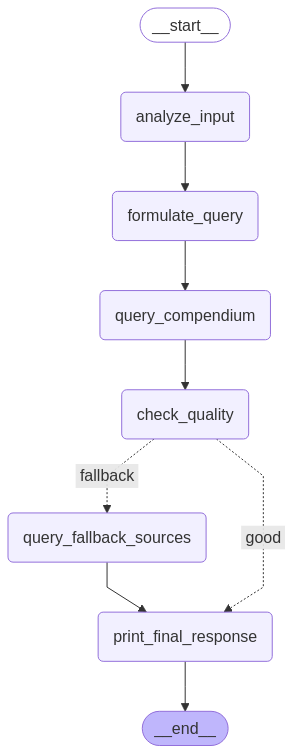

In [ ]:
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableLambda
from typing import TypedDict

# === Define the state ===
class AgentState(TypedDict):
    input: str
    dropdown_type: str
    dropdown_class: str
    cleaned_input: str
    query: str
    result: str
    source: str

# === Nodes ===

def analyze_input(state: AgentState) -> AgentState:
    user_input = state["input"].strip().lower()
    dropdown = state["dropdown_type"]
    drug_class = state["dropdown_class"]
    cleaned = user_input.title()  # you can also apply spelling correction
    return {**state, "cleaned_input": cleaned}

def formulate_query(state: AgentState) -> AgentState:
    mapping = {
        "wirkung": "Was ist die Wirkung von",
        "lagerung": "Wie sollte man lagern",
        "interaktionen": "Welche Interaktionen gibt es bei",
        "dosierung": "Wie lautet die empfohlene Dosierung von",
    }
    prefix = mapping.get(state["dropdown_type"], "Information über")
    full_query = f"{prefix} {state['cleaned_input']}?"
    return {**state, "query": full_query}

def query_compendium(state: AgentState) -> AgentState:
    result = f"[compendium result for: {state['query']}]"
    return {**state, "result": result, "source": "compendium"}

def check_quality(state: AgentState) -> str:
    if "keine" in state["result"].lower() or len(state["result"]) < 50:
        return "fallback"
    else:
        return "good"

def query_fallback_sources(state: AgentState) -> AgentState:
    # Replace with real FDA/EMA logic
    result = f"[fallback result for: {state['query']}]"
    return {**state, "result": result, "source": "fda"}

def print_final_response(state: AgentState) -> AgentState:
    print("✅ Antwort:", state["result"])
    print("📦 Quelle:", state["source"])
    return state


graph_builder = StateGraph(AgentState)

graph_builder.add_node("analyze_input", RunnableLambda(analyze_input))
graph_builder.add_node("formulate_query", RunnableLambda(formulate_query))
graph_builder.add_node("query_compendium", RunnableLambda(query_compendium))
graph_builder.add_node("query_fallback_sources", RunnableLambda(query_fallback_sources))
graph_builder.add_node("print_final_response", RunnableLambda(print_final_response))

graph_builder.add_conditional_edges("check_quality", check_quality, {
    "good": "print_final_response",
    "fallback": "query_fallback_sources"
})

graph_builder.add_node("check_quality", RunnableLambda(check_quality))

# Edges
graph_builder.set_entry_point("analyze_input")
graph_builder.add_edge("analyze_input", "formulate_query")
graph_builder.add_edge("formulate_query", "query_compendium")
graph_builder.add_edge("query_compendium", "check_quality")
graph_builder.add_edge("query_fallback_sources", "print_final_response")
graph_builder.add_edge("print_final_response", END)

graph = graph_builder.compile()
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent, AgentType
from selenium.webdriver import Edge, EdgeOptions
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from PIL import Image
import pytesseract
import os
import time
from dotenv import load_dotenv

# Load environment
load_dotenv()
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "HCI-Live-Agent"
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\FahRe\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

SCREENSHOT_PATH = "edge_screenshot.png"
driver_path = r"C:\Users\FahRe\Downloads\edgedriver_win64\msedgedriver.exe"

def slow_type(element, text, delay=0.12):
    for char in text:
        element.send_keys(char)
        time.sleep(delay)

def open_edge_and_search(search_term="Dafalgan EXTRA"):
    from selenium.common.exceptions import SessionNotCreatedException, WebDriverException

    try:
        edge_options = EdgeOptions()
        edge_options.use_chromium = True
        edge_options.add_argument("start-maximized")
        edge_options.add_argument("--disable-extensions")

        service = Service(executable_path=driver_path)
        driver = Edge(service=service, options=edge_options)

        driver.get("https://compendium.ch")
        time.sleep(4)

        search_input = driver.find_element(By.CSS_SELECTOR, "input[placeholder*='Suche']")
        slow_type(search_input, search_term, delay=0.15)
        time.sleep(0.5)
        search_input.send_keys(Keys.RETURN)

        time.sleep(4)
        driver.save_screenshot(SCREENSHOT_PATH)
        driver.quit()

        return f"Searched '{search_term}' and saved screenshot to '{SCREENSHOT_PATH}'"

    except (SessionNotCreatedException, WebDriverException) as e:
        return f"❌ Failed to launch Edge or complete search: {str(e)}"

## OCR function
def extract_text_from_screenshot(image_path=SCREENSHOT_PATH):
    if isinstance(image_path, str):
        image_path = image_path.strip().replace("image_path=", "").replace("'", "")
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return f"OCR Result:\n{text}"

def safe_search_wrapper(term, retries=2):
    for attempt in range(retries):
        print(f"🔁 Attempt {attempt + 1}")
        result = open_edge_and_search(term)
        print(result)
        if "Screenshot saved" in result:
            return result
        time.sleep(1)
    return "❌ All retries failed."


In [46]:
llm = ChatOpenAI(temperature=0, model="gpt-4", openai_api_key=os.getenv("OPENAI_KEY"))

tools = [
    Tool(
        name="SearchInCompendium",
        func=lambda term: safe_search_wrapper(term),
        description="Searches compendium.ch for a medication like 'Dafalgan EXTRA' and takes a screenshot."
    ),
    Tool(
        name="ExtractTextFromScreenshot",
        func=extract_text_from_screenshot,
        description="Extracts visible text from a screenshot using OCR."
    )
]

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)


In [47]:
goal = """
Search for 'Dafalgan EXTRA' on compendium.ch, extract the visible text from the results page.
Use tools step-by-step. Screenshot filename is 'edge_screenshot.png'.
"""

for i in range(3):
    print(f"\n🔄 Step {i+1}")
    result = agent.run(goal)
    print(result)

    if "Filmtabl" in result or "500/65 mg" in result:
        print("✅ Found product.")
        break



🔄 Step 1


> Entering new AgentExecutor chain...
I need to search for 'Dafalgan EXTRA' on compendium.ch and then extract the visible text from the screenshot of the results page.

Action: SearchInCompendium
Action Input: 'Dafalgan EXTRA'🔁 Attempt 1
Searched ''Dafalgan EXTRA'' and saved screenshot to 'edge_screenshot.png'
🔁 Attempt 2
Searched ''Dafalgan EXTRA'' and saved screenshot to 'edge_screenshot.png'

Observation: ❌ All retries failed.
Thought:The search for 'Dafalgan EXTRA' on compendium.ch failed. I can't proceed to the next step without this information.
Final Answer: The search for 'Dafalgan EXTRA' on compendium.ch failed. I was unable to extract the visible text from the results page.

> Finished chain.
The search for 'Dafalgan EXTRA' on compendium.ch failed. I was unable to extract the visible text from the results page.

🔄 Step 2


> Entering new AgentExecutor chain...
I need to search for 'Dafalgan EXTRA' on compendium.ch and then extract the visible text from the screens

KeyboardInterrupt: 